In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
df=pd.read_csv("Apple.csv",parse_dates=["Date"],index_col=[0])

In [3]:
print(df.index.freq)

None


In [4]:
df.shape

(2518, 6)

In [64]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-07-01,14.381786,14.723929,14.329286,14.615000,12.688703,391053600
2013-07-02,14.641429,15.058214,14.623929,14.946071,12.976134,469865200
2013-07-03,15.030714,15.106429,14.908929,15.028571,13.047762,240928800
2013-07-05,15.013929,15.117500,14.833929,14.907857,12.942959,274024800
2013-07-08,15.003929,15.035714,14.666071,14.823214,12.869470,298138400


In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-26,186.830002,188.050003,185.229996,185.270004,185.270004,48088700
2023-06-27,185.889999,188.389999,185.669998,188.059998,188.059998,50730800
2023-06-28,187.929993,189.899994,187.600006,189.250000,189.250000,51216800
2023-06-29,189.080002,190.070007,188.940002,189.589996,189.589996,46347300
2023-06-30,191.630005,194.479996,191.259995,193.970001,193.970001,85069600


In [7]:
test_split=round(len(df)*0.20)

In [8]:
test_split

504

In [10]:
df_for_training=df[:-504]
df_for_testing=df[-504:]

In [11]:
print(df_for_training.shape)
print(df_for_testing.shape)

(2014, 6)
(504, 6)


In [12]:
# 归一化
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)

In [13]:
df_for_testing_scaled=scaler.transform(df_for_testing)

In [14]:
df_for_training_scaled

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.33880404],
       [0.00200934, 0.0025642 , 0.00231928, 0.00257553, 0.00223922,
        0.41606462],
       [0.00502195, 0.00293405, 0.00456266, 0.00321732, 0.00279723,
        0.19163371],
       ...,
       [0.9215281 , 0.9140881 , 0.93262005, 0.92181724, 0.92612438,
        0.02483709],
       [0.92114114, 0.92452027, 0.93687072, 0.93480878, 0.93898379,
        0.01633536],
       [0.93189813, 0.93403198, 0.94474221, 0.94686684, 0.95091897,
        0.01873205]])

In [15]:
df_for_testing_scaled

array([[9.42500307e-01, 9.41089026e-01, 9.56706791e-01, 9.51767888e-01,
        9.55770295e-01, 1.74628302e-02],
       [9.45828073e-01, 9.40475354e-01, 9.55840927e-01, 9.54179472e-01,
        9.58157373e-01, 6.89929527e-03],
       [9.55888481e-01, 9.60956128e-01, 9.71505236e-01, 9.75106018e-01,
        9.78870838e-01, 3.27471935e-02],
       ...,
       [1.34306298e+00, 1.34372440e+00, 1.36389919e+00, 1.35855144e+00,
        1.37549128e+00, 5.65526934e-03],
       [1.35196272e+00, 1.34502852e+00, 1.37444696e+00, 1.36119639e+00,
        1.37814000e+00, 8.81601670e-04],
       [1.37169680e+00, 1.37885626e+00, 1.39270877e+00, 1.39527010e+00,
        1.41226219e+00, 3.88418422e-02]])

In [16]:
df_for_training_scaled.shape

(2014, 6)

In [17]:
df_for_testing_scaled.shape

(504, 6)

In [18]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)

In [19]:
trainX,trainY=createXY(df_for_training_scaled,30)

In [20]:
trainX.shape

(1984, 30, 6)

In [21]:
testX,testY=createXY(df_for_testing_scaled,30)

In [23]:
print("trainX Shape-- ",trainX.shape)
print("trainY Shape-- ",trainY.shape)

trainX Shape--  (1984, 30, 6)
trainY Shape--  (1984,)


In [24]:
print("testX Shape-- ",testX.shape)
print("testY Shape-- ",testY.shape)

testX Shape--  (474, 30, 6)
testY Shape--  (474,)


In [25]:
print("trainX[0]-- \n",trainX[0])
print("\ntrainY[0]-- ",trainY[0])

trainX[0]-- 
 [[0.         0.         0.         0.         0.         0.33880404]
 [0.00200934 0.0025642  0.00231928 0.00257553 0.00223922 0.41606462]
 [0.00502195 0.00293405 0.00456266 0.00321732 0.00279723 0.19163371]
 [0.00489206 0.00301897 0.00397229 0.00227824 0.00198077 0.22407838]
 [0.00481467 0.00239161 0.002651   0.00161978 0.00140826 0.24771742]
 [0.00301539 0.0030765  0.0025751  0.00364798 0.00317164 0.30109192]
 [0.00467371 0.00343264 0.00478755 0.00319788 0.00278032 0.23131393]
 [0.00559961 0.00437778 0.00560844 0.00502048 0.00436496 0.27531735]
 [0.00689862 0.00479967 0.00623816 0.00480377 0.00417651 0.22950779]
 [0.00616897 0.00525717 0.00662892 0.00506215 0.00440116 0.19260266]
 [0.00658631 0.00505171 0.00645181 0.00582898 0.0050679  0.16772293]
 [0.00746522 0.00546538 0.00759036 0.00585954 0.00509445 0.15052067]
 [0.00848233 0.00619135 0.00826226 0.0062624  0.00544472 0.17001766]
 [0.00840494 0.00594754 0.00650241 0.00437034 0.0037997  0.21887955]
 [0.00739889 0.00478

In [44]:
trainY[0]

0.018863438917514894

In [27]:
trainY.shape

(1984,)

In [28]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [35]:
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(LSTM(50,return_sequences=True,input_shape=(30,6)))
    grid_model.add(LSTM(50))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))

    grid_model.compile(loss = 'mse',optimizer = optimizer)
    return grid_model

grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))
parameters = {'batch_size' : [8,12,16,20],
              'epochs' : [8,10,12,14],
              'optimizer' : ['adam','Adadelta'] }

grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters,
                            cv = 2)

C:\Users\eq220\AppData\Local\Temp\ipykernel_31200\919764866.py:11: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))


In [ ]:
import numpy as np
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from tensorflow.keras.optimizers import Adam


# 定义超参数空间
space  = [Integer(32, 256, name='lstm_neurons'),
          Real(0.1, 0.9, name='dropout_rate'),
          Real(1e-4, 1e-2, name='learning_rate', prior='log-uniform')]

# 定义优化目标函数
@use_named_args(space)
def objective(**params):
    # 在这里构建您的 LSTM 模型
    model = Sequential()
    model.add(LSTM(params['lstm_neurons'], input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(Dropout(params['dropout_rate']))
    model.add(Dense(1))
    
    optimizer = Adam(learning_rate=params['learning_rate'])
    model.compile(optimizer=optimizer, loss='mse')
    
    history = model.fit(trainX, trainY, epochs=50, batch_size=32, validation_data=(testX, testY), verbose=0, shuffle=False)
    
    # 返回验证损失
    return history.history['val_loss'][-1]

# 执行贝叶斯优化
res = gp_minimize(objective, space, n_calls=50, random_state=0)

# 输出最佳参数
print("Best parameters: {}".format(res.x))


In [36]:
grid_search = grid_search.fit(trainX,trainY)

Epoch 1/8
124/124 [==============================] - 12s 69ms/step - loss: 0.0067 - val_loss: 0.0072
Epoch 2/8
124/124 [==============================] - 7s 56ms/step - loss: 0.0027 - val_loss: 0.0043
Epoch 3/8
124/124 [==============================] - 7s 55ms/step - loss: 0.0030 - val_loss: 0.0216
Epoch 4/8
124/124 [==============================] - 7s 54ms/step - loss: 0.0021 - val_loss: 0.0057
Epoch 5/8
124/124 [==============================] - 6s 51ms/step - loss: 0.0017 - val_loss: 0.0030
Epoch 6/8
124/124 [==============================] - 8s 61ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 7/8
124/124 [==============================] - 8s 62ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 8/8
124/124 [==============================] - 4s 31ms/step - loss: 1.0784e-04
Epoch 1/8
124/124 [==============================] - 12s 61ms/step - loss: 4.4230e-04 - val_loss: 0.0893
Epoch 2/8
124/124 [==============================] - 8s 64ms/step - loss: 1.3686e-04 - val_loss: 0.0266
Epoch

Epoch 4/12
124/124 [==============================] - 3s 21ms/step - loss: 0.0022 - val_loss: 0.0037
Epoch 5/12
124/124 [==============================] - 3s 24ms/step - loss: 0.0023 - val_loss: 0.0180
Epoch 6/12
124/124 [==============================] - 3s 21ms/step - loss: 0.0020 - val_loss: 0.0046
Epoch 7/12
124/124 [==============================] - 3s 26ms/step - loss: 0.0019 - val_loss: 0.0027
Epoch 8/12
124/124 [==============================] - 4s 30ms/step - loss: 0.0021 - val_loss: 0.0073
Epoch 9/12
124/124 [==============================] - 3s 27ms/step - loss: 0.0024 - val_loss: 0.0046
Epoch 10/12
124/124 [==============================] - 4s 30ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 11/12
124/124 [==============================] - 4s 29ms/step - loss: 0.0017 - val_loss: 0.0024
Epoch 12/12
124/124 [==============================] - 1s 12ms/step - loss: 1.5938e-04
Epoch 1/12
124/124 [==============================] - 9s 38ms/step - loss: 4.8994e-04 - val_loss: 0.069

83/83 [==============================] - 2s 28ms/step - loss: 8.0409e-05 - val_loss: 0.0215
Epoch 10/10
83/83 [==============================] - 1s 13ms/step - loss: 0.0028
Epoch 1/10
83/83 [==============================] - 9s 44ms/step - loss: 0.0903 - val_loss: 0.4836
Epoch 2/10
83/83 [==============================] - 2s 29ms/step - loss: 0.0865 - val_loss: 0.4511
Epoch 3/10
83/83 [==============================] - 2s 28ms/step - loss: 0.0754 - val_loss: 0.4201
Epoch 4/10
83/83 [==============================] - 2s 28ms/step - loss: 0.0692 - val_loss: 0.3900
Epoch 5/10
83/83 [==============================] - 3s 34ms/step - loss: 0.0630 - val_loss: 0.3610
Epoch 6/10
83/83 [==============================] - 2s 29ms/step - loss: 0.0576 - val_loss: 0.3329
Epoch 7/10
83/83 [==============================] - 2s 27ms/step - loss: 0.0510 - val_loss: 0.3068
Epoch 8/10
83/83 [==============================] - 2s 27ms/step - loss: 0.0438 - val_loss: 0.2821
Epoch 9/10
83/83 [=================

62/62 [==============================] - 2s 24ms/step - loss: 0.0036 - val_loss: 0.5199
Epoch 6/8
62/62 [==============================] - 2s 26ms/step - loss: 0.0033 - val_loss: 0.5074
Epoch 7/8
62/62 [==============================] - 2s 27ms/step - loss: 0.0030 - val_loss: 0.4954
Epoch 8/8
62/62 [==============================] - 1s 16ms/step - loss: 0.0787
Epoch 1/10
62/62 [==============================] - 7s 46ms/step - loss: 0.0233 - val_loss: 0.0034
Epoch 2/10
62/62 [==============================] - 2s 31ms/step - loss: 0.0025 - val_loss: 0.0088
Epoch 3/10
62/62 [==============================] - 2s 28ms/step - loss: 0.0024 - val_loss: 0.0026
Epoch 4/10
62/62 [==============================] - 2s 27ms/step - loss: 0.0024 - val_loss: 0.0058
Epoch 5/10
62/62 [==============================] - 2s 31ms/step - loss: 0.0022 - val_loss: 0.0030
Epoch 6/10
62/62 [==============================] - 2s 24ms/step - loss: 0.0020 - val_loss: 0.0041
Epoch 7/10
62/62 [=========================

Epoch 10/12
62/62 [==============================] - 1s 22ms/step - loss: 0.2543 - val_loss: 1.1337
Epoch 11/12
62/62 [==============================] - 3s 41ms/step - loss: 0.2483 - val_loss: 1.0924
Epoch 12/12
62/62 [==============================] - 1s 23ms/step - loss: 0.0106
Epoch 1/12
62/62 [==============================] - 9s 83ms/step - loss: 0.0202 - val_loss: 1.9897
Epoch 2/12
62/62 [==============================] - 4s 57ms/step - loss: 0.0193 - val_loss: 1.9580
Epoch 3/12
62/62 [==============================] - 3s 46ms/step - loss: 0.0186 - val_loss: 1.9257
Epoch 4/12
62/62 [==============================] - 2s 39ms/step - loss: 0.0176 - val_loss: 1.8937
Epoch 5/12
62/62 [==============================] - 2s 32ms/step - loss: 0.0169 - val_loss: 1.8615
Epoch 6/12
62/62 [==============================] - 3s 45ms/step - loss: 0.0160 - val_loss: 1.8296
Epoch 7/12
62/62 [==============================] - 3s 41ms/step - loss: 0.0152 - val_loss: 1.7978
Epoch 8/12
62/62 [========

Epoch 8/8
50/50 [==============================] - 1s 19ms/step - loss: 5.1162e-04
Epoch 1/8
50/50 [==============================] - 8s 76ms/step - loss: 5.4550e-04 - val_loss: 0.1726
Epoch 2/8
50/50 [==============================] - 3s 64ms/step - loss: 1.4341e-04 - val_loss: 0.0963
Epoch 3/8
50/50 [==============================] - 3s 62ms/step - loss: 1.3696e-04 - val_loss: 0.0951
Epoch 4/8
50/50 [==============================] - 3s 63ms/step - loss: 1.0731e-04 - val_loss: 0.0745
Epoch 5/8
50/50 [==============================] - 3s 55ms/step - loss: 1.1232e-04 - val_loss: 0.0607
Epoch 6/8
50/50 [==============================] - 3s 62ms/step - loss: 9.5448e-05 - val_loss: 0.0590
Epoch 7/8
50/50 [==============================] - 3s 52ms/step - loss: 8.8715e-05 - val_loss: 0.0507
Epoch 8/8
50/50 [==============================] - 2s 41ms/step - loss: 0.0023
Epoch 1/8
50/50 [==============================] - 9s 87ms/step - loss: 0.5969 - val_loss: 2.5992
Epoch 2/8
50/50 [=========

50/50 [==============================] - 4s 74ms/step - loss: 0.1434 - val_loss: 0.7576
Epoch 14/14
50/50 [==============================] - 2s 33ms/step - loss: 0.0035
Epoch 1/14
50/50 [==============================] - 9s 82ms/step - loss: 0.0236 - val_loss: 1.5649
Epoch 2/14
50/50 [==============================] - 3s 70ms/step - loss: 0.0228 - val_loss: 1.5389
Epoch 3/14
50/50 [==============================] - 3s 68ms/step - loss: 0.0220 - val_loss: 1.5126
Epoch 4/14
50/50 [==============================] - 3s 61ms/step - loss: 0.0213 - val_loss: 1.4863
Epoch 5/14
50/50 [==============================] - 3s 55ms/step - loss: 0.0206 - val_loss: 1.4597
Epoch 6/14
50/50 [==============================] - 3s 58ms/step - loss: 0.0195 - val_loss: 1.4335
Epoch 7/14
50/50 [==============================] - 3s 54ms/step - loss: 0.0190 - val_loss: 1.4072
Epoch 8/14
50/50 [==============================] - 3s 59ms/step - loss: 0.0181 - val_loss: 1.3812
Epoch 9/14
50/50 [=====================

In [77]:
!pip install scikit-optimize


     -------------------------------------- 100.3/100.3 kB 5.6 MB/s eta 0:00:00


In [37]:
grid_search.best_params_

{'batch_size': 8, 'epochs': 8, 'optimizer': 'adam'}

In [38]:
my_model=grid_search.best_estimator_.model

In [39]:
my_model

In [40]:
prediction=my_model.predict(testX)

15/15 [==============================] - 1s 18ms/step


In [45]:
print("prediction\n", prediction)
print("\nPrediction Shape-",prediction.shape)

prediction
 [[1.0041462 ]
 [1.0056638 ]
 [1.0087887 ]
 [1.0124809 ]
 [1.0162823 ]
 [1.0167611 ]
 [1.0147066 ]
 [1.0141984 ]
 [1.0154316 ]
 [1.0175748 ]
 [1.0187186 ]
 [1.0186088 ]
 [1.0182844 ]
 [1.0212272 ]
 [1.0250933 ]
 [1.0297784 ]
 [1.0349245 ]
 [1.0398943 ]
 [1.0458348 ]
 [1.050587  ]
 [1.053408  ]
 [1.0503774 ]
 [1.0456525 ]
 [1.0394987 ]
 [1.0338904 ]
 [1.0292021 ]
 [1.0232223 ]
 [1.0140147 ]
 [1.0063853 ]
 [1.0020128 ]
 [1.000893  ]
 [1.0010002 ]
 [1.0000353 ]
 [0.99576104]
 [0.9920882 ]
 [0.988185  ]
 [0.98459494]
 [0.97929084]
 [0.97537714]
 [0.9725958 ]
 [0.9734838 ]
 [0.97543526]
 [0.97696835]
 [0.9773381 ]
 [0.9759935 ]
 [0.97692037]
 [0.97966045]
 [0.9834266 ]
 [0.9900305 ]
 [0.99763566]
 [1.0044734 ]
 [1.010001  ]
 [1.0137691 ]
 [1.0171059 ]
 [1.0192384 ]
 [1.0229913 ]
 [1.023037  ]
 [1.0229186 ]
 [1.0234346 ]
 [1.0255723 ]
 [1.0278915 ]
 [1.0301948 ]
 [1.0315793 ]
 [1.0323247 ]
 [1.030407  ]
 [1.027972  ]
 [1.0264926 ]
 [1.0264246 ]
 [1.0272403 ]
 [1.0302324 ]
 [1.0367

In [46]:
prediction.shape

(474, 1)

In [73]:
scaler.inverse_transform(prediction)

ValueError: non-broadcastable output operand with shape (1,1) doesn't match the broadcast shape (1,5)

In [49]:
prediction_copies = np.repeat(prediction, 6, axis=-1)
inverse_transformed_data = scaler.inverse_transform(prediction_copies)


In [50]:
prediction_copies_array = np.repeat(prediction, 6, axis=-1)

In [51]:
prediction_copies_array.shape

(474, 6)

In [52]:
prediction_copies_array

array([[1.0041462, 1.0041462, 1.0041462, 1.0041462, 1.0041462, 1.0041462],
       [1.0056638, 1.0056638, 1.0056638, 1.0056638, 1.0056638, 1.0056638],
       [1.0087887, 1.0087887, 1.0087887, 1.0087887, 1.0087887, 1.0087887],
       ...,
       [1.2345686, 1.2345686, 1.2345686, 1.2345686, 1.2345686, 1.2345686],
       [1.2381878, 1.2381878, 1.2381878, 1.2381878, 1.2381878, 1.2381878],
       [1.2420714, 1.2420714, 1.2420714, 1.2420714, 1.2420714, 1.2420714]],
      dtype=float32)

In [54]:
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),6)))[:,0]

In [55]:
pred

array([144.13577, 144.33186, 144.73567, 145.21275, 145.70398, 145.76584,
       145.50037, 145.43471, 145.59406, 145.87099, 146.01878, 146.00461,
       145.96269, 146.34296, 146.84251, 147.4479 , 148.11288, 148.75508,
       149.52269, 150.13678, 150.5013 , 150.10968, 149.49915, 148.70395,
       147.97926, 147.37344, 146.60075, 145.41096, 144.42511, 143.8601 ,
       143.7154 , 143.72925, 143.60457, 143.05226, 142.57765, 142.07329,
       141.60939, 140.92401, 140.41827, 140.05888, 140.17363, 140.4258 ,
       140.62389, 140.67168, 140.49792, 140.61769, 140.97176, 141.45842,
       142.31177, 143.29448, 144.17805, 144.8923 , 145.37923, 145.81041,
       146.08595, 146.5709 , 146.5768 , 146.56151, 146.62819, 146.90442,
       147.2041 , 147.50172, 147.68062, 147.77695, 147.52914, 147.2145 ,
       147.02333, 147.01456, 147.11995, 147.50659, 148.35031, 149.64821,
       151.18228, 152.49747, 153.61201, 153.94197, 154.30031, 154.90305,
       155.83707, 156.16331, 156.3759 , 156.90793, 

In [58]:
original_copies_array = np.repeat(testY,6, axis=-1)

original_copies_array.shape

original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),6)))[:,0]

In [59]:
original

array([146.190002, 148.970001, 148.539993, 150.229996, 149.800003,
       145.029999, 147.440002, 148.309998, 149.449997, 149.809998,
       148.350006, 147.479996, 149.      , 152.660004, 152.830002,
       153.869995, 153.759995, 154.970001, 156.979996, 155.490005,
       155.      , 150.630005, 150.350006, 148.559998, 148.440002,
       148.820007, 143.800003, 143.929993, 144.449997, 146.649994,
       145.660004, 145.470001, 143.25    , 142.470001, 143.660004,
       141.899994, 141.759995, 139.490005, 139.470001, 143.059998,
       144.029999, 142.270004, 143.229996, 141.240005, 142.110001,
       143.770004, 143.449997, 147.009995, 148.699997, 148.809998,
       149.690002, 148.679993, 149.330002, 149.360001, 149.820007,
       147.220001, 148.990005, 148.660004, 150.389999, 151.580002,
       151.889999, 151.410004, 150.199997, 150.020004, 148.960007,
       148.429993, 150.369995, 149.940002, 151.      , 153.710007,
       157.649994, 161.679993, 161.119995, 160.75    , 159.570

In [60]:
print("Pred Values-- " ,pred)
print("\nOriginal Values-- ",original)

Pred Values--  [144.13577 144.33186 144.73567 145.21275 145.70398 145.76584 145.50037
 145.43471 145.59406 145.87099 146.01878 146.00461 145.96269 146.34296
 146.84251 147.4479  148.11288 148.75508 149.52269 150.13678 150.5013
 150.10968 149.49915 148.70395 147.97926 147.37344 146.60075 145.41096
 144.42511 143.8601  143.7154  143.72925 143.60457 143.05226 142.57765
 142.07329 141.60939 140.92401 140.41827 140.05888 140.17363 140.4258
 140.62389 140.67168 140.49792 140.61769 140.97176 141.45842 142.31177
 143.29448 144.17805 144.8923  145.37923 145.81041 146.08595 146.5709
 146.5768  146.56151 146.62819 146.90442 147.2041  147.50172 147.68062
 147.77695 147.52914 147.2145  147.02333 147.01456 147.11995 147.50659
 148.35031 149.64821 151.18228 152.49747 153.61201 153.94197 154.30031
 154.90305 155.83707 156.16331 156.3759  156.90793 158.08784 159.70227
 161.2825  163.0064  164.3425  165.00615 165.74014 165.87225 165.32864
 164.59113 164.28197 164.41296 164.86873 165.74107 166.61171 167.

In [61]:
import matplotlib.pyplot as plt

In [ ]:
df_dates = df.index[-len(original):]

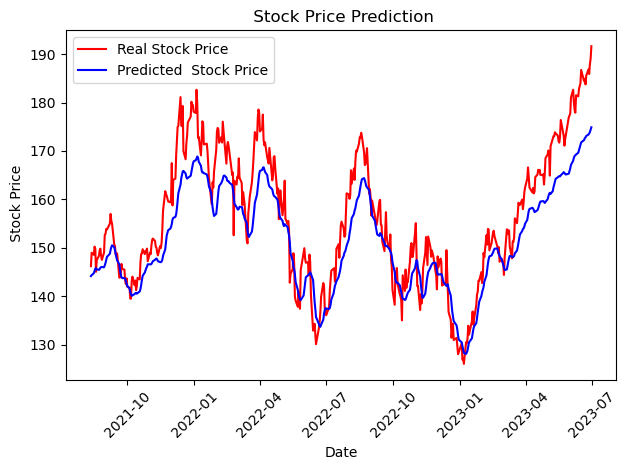

In [74]:
plt.plot(df_dates, original, color = 'red', label = 'Real Stock Price')
plt.plot(df_dates, pred, color = 'blue', label = 'Predicted  Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel(' Stock Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [48]:
df_30_days_past=df.iloc[-30:,:]

In [49]:
df_30_days_past

,Open,High,Low,Close,Adj Close
Date,,,,,
2021-08-18,101.080002,103.470001,100.760002,101.410004,101.242561
2021-08-19,100.000000,100.820000,98.599998,99.419998,99.255844
2021-08-20,99.589996,100.669998,99.099998,100.050003,99.884804
2021-08-23,100.599998,101.480003,100.269997,100.970001,100.803284
2021-08-24,101.290001,103.510002,101.059998,103.269997,103.099487
2021-08-25,103.360001,105.129997,102.550003,104.699997,104.527122
2021-08-26,104.459999,104.620003,102.839996,103.379997,103.209305
2021-08-27,103.900002,106.150002,103.900002,106.089996,105.914825
2021-08-30,106.330002,106.459999,104.800003,105.190002,105.016312


In [50]:
df_30_days_future=pd.read_csv("test.csv",parse_dates=["Date"],index_col=[0])
df_30_days_future.shape

(30, 4)

In [51]:
df_30_days_future

,High,Low,Close,Adj Close
Date,,,,
2021-09-30,107.089996,102.949997,103.029999,102.939865
2021-10-01,106.389999,103.669998,105.820000,105.727425
2021-10-04,107.080002,104.599998,104.900002,104.808235
2021-10-05,106.000000,103.750000,104.900002,104.808235
2021-10-06,104.419998,102.059998,104.330002,104.238731
2021-10-07,106.529999,104.330002,105.510002,105.417702
2021-10-08,106.220001,104.660004,104.720001,104.628387
2021-10-11,105.760002,103.970001,104.080002,103.988953
2021-10-12,104.040001,101.559998,102.720001,102.630142


In [52]:
df_30_days_future["Open"]=0
df_30_days_future=df_30_days_future[["Open","High","Low","Close","Adj Close"]]
old_scaled_array=scaler.transform(df_30_days_past)
new_scaled_array=scaler.transform(df_30_days_future)
old_scaled_df=pd.DataFrame(old_scaled_array)
new_scaled_df=pd.DataFrame(new_scaled_array)

new_scaled_df.iloc[:,0]=np.nan
full_df=pd.concat([old_scaled_df,new_scaled_df]).reset_index().drop(["index"],axis=1)

In [53]:
full_df.shape

(60, 5)

In [54]:
full_df.tail()

,0,1,2,3,4
55,NaN,0.143640,0.164162,0.150135,0.349458
56,NaN,0.152749,0.171268,0.159953,0.367565
57,NaN,0.154599,0.175349,0.159063,0.365924
58,NaN,0.171024,0.181345,0.167045,0.380645
59,NaN,0.161242,0.174766,0.160565,0.368694


In [55]:
full_df.shape

(60, 5)

In [56]:
full_df_scaled_array=full_df.values

In [57]:
full_df_scaled_array.shape

(60, 5)

In [58]:
all_data=[]
time_step=30
for i in range(time_step,len(full_df_scaled_array)):
    data_x=[]
    data_x.append(full_df_scaled_array[i-time_step:i,0:full_df_scaled_array.shape[1]])
    data_x=np.array(data_x)
    prediction=my_model.predict(data_x)
    all_data.append(prediction)
    full_df.iloc[i,0]=prediction

1/1 [==============================] - 0s 17ms/step


In [86]:
all_data

[array([[0.1482769]], dtype=float32),
 array([[0.15000442]], dtype=float32),
 array([[0.1514765]], dtype=float32),
 array([[0.1526272]], dtype=float32),
 array([[0.15333982]], dtype=float32),
 array([[0.15340161]], dtype=float32),
 array([[0.15370393]], dtype=float32),
 array([[0.15395224]], dtype=float32),
 array([[0.15393883]], dtype=float32),
 array([[0.15323266]], dtype=float32),
 array([[0.1521465]], dtype=float32),
 array([[0.15122248]], dtype=float32),
 array([[0.1509795]], dtype=float32),
 array([[0.15092765]], dtype=float32),
 array([[0.15114477]], dtype=float32),
 array([[0.15176119]], dtype=float32),
 array([[0.15193477]], dtype=float32),
 array([[0.15188926]], dtype=float32),
 array([[0.15212983]], dtype=float32),
 array([[0.15332372]], dtype=float32),
 array([[0.15389305]], dtype=float32),
 array([[0.15412788]], dtype=float32),
 array([[0.15420789]], dtype=float32),
 array([[0.15464287]], dtype=float32),
 array([[0.15528473]], dtype=float32),
 array([[0.15572071]], dtype=f

In [92]:
new_array=np.array(all_data)
#new_array=new_array.reshape(-1,1)
prediction_copies_array = np.repeat(new_array, 5, axis=-1)
y_pred_future_30_days = scaler.inverse_transform(np.reshape(prediction_copies_array,(len(new_array),5)))[:,0]

In [94]:
y_pred_future_30_days

array([104.84653 , 105.46312 , 105.98854 , 106.39925 , 106.653595,
       106.67565 , 106.783554, 106.872185, 106.8674  , 106.61535 ,
       106.22767 , 105.897865, 105.81114 , 105.79263 , 105.87013 ,
       106.09014 , 106.15211 , 106.135864, 106.221725, 106.64785 ,
       106.85106 , 106.93487 , 106.96343 , 107.11868 , 107.347786,
       107.503395, 107.54152 , 107.89776 , 108.40207 , 109.29391 ],
      dtype=float32)

In [62]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

In [74]:
my_model.save('Model_future_value.h5')
print('Model Saved!')

Model Saved!


In [75]:
scaler

MinMaxScaler()

In [76]:
import pickle
scalerfile = 'scaler_model_future_value.pkl'
pickle.dump(scaler, open(scalerfile, 'wb'))

# END!!!!